# Stock Price Prediction






### Objective
To predict the Stock price from the given past data.

<h3>Table of Contents</h3>
<ul>
    <li><a href="#ref1">Importing the Stock Market Data in csv format</a></li>
    <li><a href="#ref2">Data Wrangling </a></li>
    <li><a href="#ref3"> Data Visualization</a></li>
    <li><a href="#ref4"> Model Development & Evaluation</a></li>
    <li><a href="#ref5"> Conclusion</a></li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
%matplotlib inline 
import numpy as np

## Definition
Stock market prediction: To determine the future value of a company stock or other financial instrument 
                         traded on an exchange

## Terminologies of Stock Market
Open Price: The price at which a security first trades when an exchange opens for the day.<br/>

Low Price: The lowest price that a stock trades on a particular day.<br/>

High Price: The highest price that a stock trades on a particular day.<br/>

Close price: The raw price or cash value of the last transacted price in a security before the market 
            officially closes for normal trading on a particular day.<br/>
            
Adjusted Close Price (Adj. Close): The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.<br/>

Volume: The total number of shares traded in a specified time frame.


### Importing the Data in csv format

In [2]:
stock = pd.read_csv("C:/Users/HP/Downloads/1729258-1613615-Stock_Price_data_set_(1) (2).csv")

### Data Wrangling

In [3]:
#To view the five rows of the dataset
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
#To view the last five rows of the dataset
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
#To check the information related to the given data
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
#To check the number of rows & columns 
stock.shape

(1009, 7)

In [7]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
stock.index

RangeIndex(start=0, stop=1009, step=1)

In [9]:
#To check whether if there is NaN value by using isna() function
stock.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
#To check whether if there is any duplicate value by using duplicated() function
stock.duplicated().any()

False

In [11]:
#Converting the Date column into a datatime format 
stock['Date'] = pd.to_datetime(stock['Date'])

In [12]:
#The datatype of Date column has been changed into a datetime format
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [13]:
#To obtain the number of days recorded in the dataset
print('Stock prices between', stock.Date.min(),  stock.Date.max())
print('Total_no_of_days','=', (stock.Date.max() - stock.Date.min()).days)

Stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total_no_of_days = 1460


In [14]:
#To view the statistical information of the Dataset
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<AxesSubplot:>

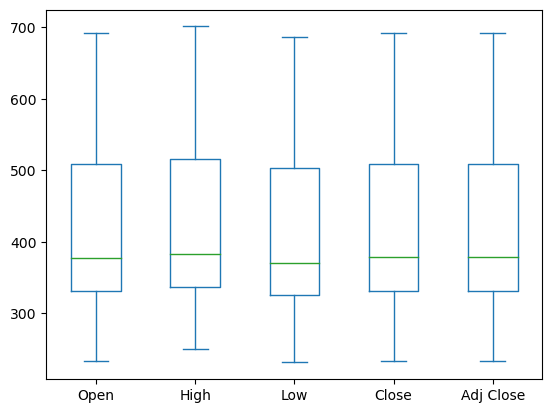

In [15]:
#Boxplot primarily can be used to check whether there is any outlier in a given dataset
stock[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind = 'box')

Since there is no outlier in the above plot which basically indicates that our given dataset is clean. 

#### Correlation
Correlation ranges between 0 to 1. Strong correlation ~ 1, No correlation ~ 0 whereas; 
Negative correlation < 0. <br/>
It is used to obtain the information related to the correlation between different variables in the dataset. <br/>
The correlation function also helps to identify and plot the graph with highly correlated variable in order to obtain the better result.

In [16]:
stock.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_33336\2678749480.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In this case, we need to view the close price of stock on each day in order to check whether how the stock prices are been affected on daily basis. So, according to the given dataset, we will be predicting the dataset of 2018-2022 against the close price of the stock market.

In [17]:
#Adjusted Close price is same as Close Price. So, therefore, choosing the Close Price
stock['Close'] == stock['Adj Close']

0       True
1       True
2       True
3       True
4       True
        ... 
1004    True
1005    True
1006    True
1007    True
1008    True
Length: 1009, dtype: bool

### Data Visualization

In [18]:
#Plotting with actual dataset of Date column against Close price column
layout = go.Layout(title = 'Stock Prices',
                  xaxis= dict(title = 'Date',
                             titlefont = dict(family = 'Courier New, monospace',
                                             size = 18,
                                             color = '#7f7f7f')),
                  yaxis= dict(title = 'Price',
                             titlefont = dict(family = 'Courier New, monospace',
                                             size = 18,
                                             color = '#7f7f7f')))

stock_data = [{'x': stock['Date'], 'y': stock['Close']}]
plot = go.Figure(data = stock_data, layout = layout)

In [19]:
iplot(plot)

### Importing the required libraries for Model development

In [20]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [21]:
#Splitting the dataset into Training and Testing in order to test the model
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 303
number of training samples: 706


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [24]:
#Creating a Linear regression object
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

### Model Development

In [25]:
#Plotting actual and predicted values of train dataset
trace0 = go.Scatter(x = X_train.T[0],
                   y = Y_train,
                   mode = 'markers',
                   name = 'Actual')

trace1 = go.Scatter(x = X_train.T[0],
                   y = lm.predict(X_train).T,
                   mode = 'lines',
                   name = 'Predicted')

stock_data1 = [trace0, trace1]
layout.xaxis.title.text = 'Days'
plot2 = go.Figure(data = stock_data1, layout = layout)

In [26]:
iplot(plot2)

In [27]:
lm1 = LinearRegression()
lm1.fit(X_test, Y_test)

LinearRegression()

In [28]:
#Plotting actual and predicted values of test dataset
trace2 = go.Scatter(x = X_test.T[0],
                   y = Y_test,
                   mode = 'markers',
                   name = 'Actual')

trace3 = go.Scatter(x = X_test.T[0],
                    y = lm.predict(X_test).T,
                   mode = 'lines',
                   name = 'Predicted')

stock_data2 = [trace2, trace3]
layout.xaxis.title.text = 'Days'
plot3 = go.Figure(data = stock_data1, layout = layout)

In [29]:
iplot(plot3)

### Model Evaluation

#### R-squared (ranges from 0 to 1)
It explains how much variation of dependent variable (i.e. Close price) is explained by the independent variable (i.e. Date column)

In [30]:
#R-squared value of train dataset
r2_S = r2_score(Y_train, lm.predict(X_train))
r2_S

0.7170561728519733

In [31]:
#R-squared value of test dataset
r2_S1 = r2_score(Y_test, lm.predict(X_test))
r2_S1

0.6829757394479775

#### Mean Squared Error (MSE)
It measures the average squared difference between the predicted values and the actual values.

In [32]:
mse_train = mse(Y_train, lm.predict(X_train))
mse_train

3341.9066354364113

In [33]:
mse_test = mse(Y_test, lm.predict(X_test))
mse_test

3607.836287934116

In [34]:
#Train and test values related to r2_squared and mse
scores = f'''{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(20)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}'''
print(scores)

Metric           Train                Test        
r2_score            0.7170561728519733	0.6829757394479775
MSE       3341.9066354364113	3607.836287934116


### Conclusion

According to R-squared values, in case of our Train dataset, by using Linear Regression Model, approximately 71% of the variation in the Close price dataset had been explained by number of days.

Whereas, in case of Test dataset, by using Linear Regression Model, approximately 68% of the variation in the Close price dataset had been explained by the number of days.

There is approximately 3.4% deviation between the Train and Test dataset when run by the model.

Hence, according to the obtained results, the Linear Regression Model was successfully able to explain the relation between the Close Price and Number of days. So, this report concludes that the closing rate of a particular day affects the following day transaction. 